### Import Packages and Dependencies

In [1]:
import os
import sys
from pathlib import Path

os.chdir(Path(os.getcwd()).parents[0])
sys.path.append(os.getcwd())

from pytorch_lightning import LightningDataModule
from matplotlib.colors import LinearSegmentedColormap
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import ast

/home/l727n/miniconda3/envs/xai-eval/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.data.imagenet_datamodule import ImageNetDataModule

datamodule = ImageNetDataModule(data_dir = "data/datasets/", batch_size = 20)
dataloader = datamodule.dataloader()

with torch.no_grad():
    x_batch, y_batch = next(iter(dataloader))

In [3]:
print(sorted(glob.glob("data/attribution_maps/Image/*"), key=os.path.getmtime))

file = sorted(glob.glob("data/attribution_maps/Image/*"), key=os.path.getmtime)[-1] # selects always the newsest
data = np.load(file)
data = [data['arr_0'],data['arr_1'],data['arr_2']]

with open('data/datasets/imagenet_classes.txt', "r") as cf:
    imagnet_classes = ast.literal_eval(cf.read())


['data/attribution_maps/Image/attr_imagenet_dataset_17_methods_2023-02-07_16-20-22_.npz', 'data/attribution_maps/Image/attr_imagenet_dataset_17_methods_2023-02-07_16-45-05_.npz', 'data/attribution_maps/Image/attr_imagenet_dataset_14_methods_2023-03-01_09-17-38_.npz', 'data/attribution_maps/Image/attr_imagenet_dataset_14_methods_2023-03-08_18-52-40_.npz']


In [10]:
methods = ["Occlusion","LIME","Kernel SHAP","Saliency","Input x Gradient", "Guided Backprob","GradCAM","ScoreCAM","GradCAM++", "IG", "EG", "Deeplift", "Deeplift SHAP", "LRP", "Raw Attention", "Rollout Attention", "LRP Attention"]
models = ["ResNet50","EfficientNetb0","Deit ViT"]
n = 1
model = 0

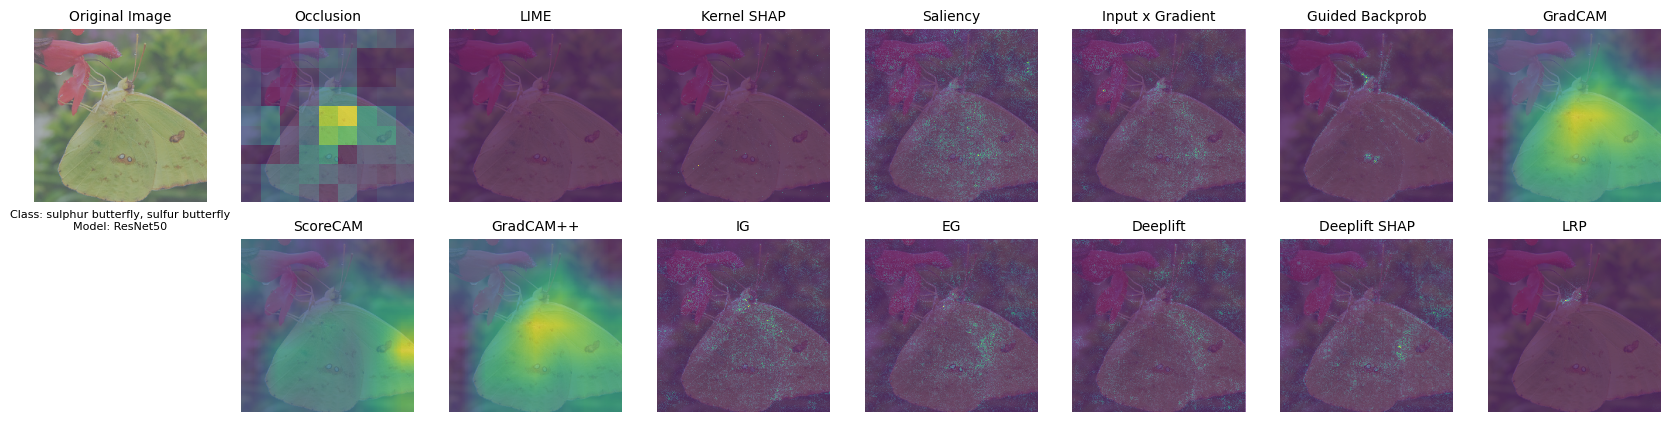

In [11]:
fig, axes = plt.subplots(3 if model == 2 else 2, 8, figsize=(20, 7) if model == 2 else (21,5), sharey=True, sharex = True)

def deprocess_image(img):
    """ see https://github.com/jacobgil/keras-grad-cam/blob/master/grad-cam.py#L65 """
    img = img - np.mean(img)
    img = img / (np.std(img) + 1e-5)
    img = img * 0.1
    img = img + 0.5
    img = np.clip(img, 0, 1)
    return img

img = deprocess_image(x_batch[n].detach().numpy().transpose(1,2,0))

axes[0,0].imshow(img)
axes[0,0].axis('off')
axes[0,0].axes.set_title("Original Image",fontsize=10)

for i in range(7):
    mask = np.abs(data[model][n,i,:]).mean(0)
    axes[0,i+1].imshow(img)
    sns.heatmap(ax =  axes[0,(i+1)], data = mask,cbar=False, cmap="viridis", alpha=0.6)
    axes[0,i+1].axis('off')
    axes[0,i+1].axes.set_title(methods[i],fontsize=10)
for i in range(7):
    mask = np.abs(data[model][n,7 + i,:]).mean(0)
    axes[1,i+1].imshow(img)
    sns.heatmap(ax =  axes[1,(i+1)], data = mask,cbar=False, cmap="viridis", alpha=0.6)
    axes[1,i+1].axis('off')
    axes[1,i+1].axes.set_title(methods[7 + i],fontsize=10)

axes[1,0].axes.set_title("Class: " + str(imagnet_classes[int(y_batch[n])] + "\nModel: " + models[model]),fontsize=8)
axes[1,0].axis('off')

if model == 2:
    for i in range(3):
        mask = np.abs(data[model][n,14 + i,:]).mean(0)
        axes[2,i+1].imshow(img)
        sns.heatmap(ax =  axes[2,(i+1)], data = mask,cbar=False, cmap="viridis", alpha=0.6)
        axes[2,i+1].axis('off')
        axes[2,i+1].axes.set_title(methods[14 + i],fontsize=10)
    axes[2,0].axis('off')
    axes[2,4].axis('off')
    axes[2,5].axis('off')
    axes[2,6].axis('off')
    axes[2,7].axis('off')